# Regresión logística para predicciones bancarias

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [347]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [348]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [349]:
n_filas = data.shape[0]
n_columns = data.shape[1]
print(f'Filas: {n_filas}\nColumnas: {n_columns}')

Filas: 4119
Columnas: 21


In [350]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [351]:
# Convertimos la variable y en 0 y 1
data["y_new"]  = (data["y"]=="yes").astype(int)

In [352]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [353]:
def transform_education(education):
    if education in ["basic.4y", "basic.6y", "basic.9y"]: return "Basic"
    elif education == "high.school": return "High School"
    elif education == "professional.course": return "Professional course"
    elif education == "university.degree": return "University Degree"
    elif education == "illiterate": return "Illiterate"
    elif education == "unknown": return "Unknown"
    else: return education

In [354]:
try:
    data = data.drop("education_new", axis=1)
except:
    print("No existe la columna")
    
data["education_new"] = data.apply(lambda x: transform_education(x.education), axis=1)
data["education_new"].unique()

No existe la columna


array(['Basic', 'High School', 'University Degree', 'Professional course',
       'Unknown', 'Illiterate'], dtype=object)

In [355]:
data["y_new"].value_counts()

0    3668
1     451
Name: y_new, dtype: int64

In [356]:
data.groupby("y_new").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y_new,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [357]:
data.groupby("education_new").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_new
education_new,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### Frecuencia de compra en funcion del nivel de educacion

Text(0, 0.5, 'Nivel de compras')

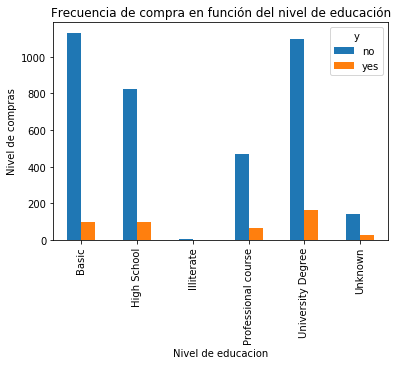

In [358]:
%matplotlib inline
pd.crosstab(data.education_new, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de educacion')
plt.ylabel('Nivel de compras')

Text(0, 0.5, 'Proporción de clientes')

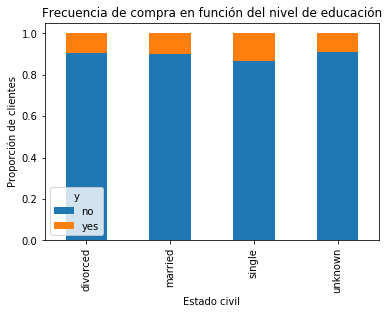

In [359]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1), axis=0).plot(kind="bar", stacked=True)
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

### Nivel de compra en función del día de la semana

Text(0, 0.5, 'Nivel de compras')

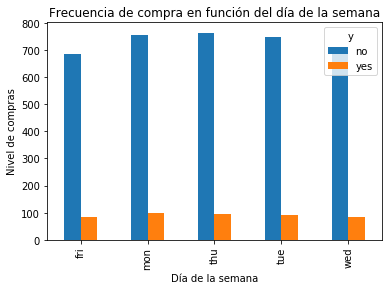

In [360]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Nivel de compras')

Text(0, 0.5, 'Nivel de compras')

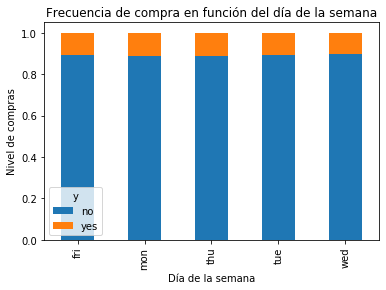

In [361]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1), axis=0).plot(kind="bar", stacked=True)
plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Nivel de compras')

### Frecuencia de compra en función del mes

Text(0, 0.5, 'Nivel de compras')

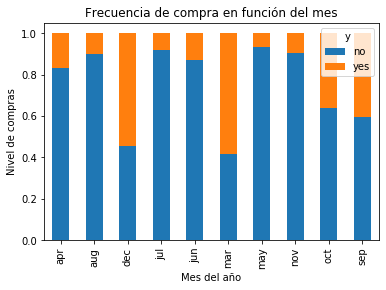

In [362]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1), axis=0).plot(kind="bar", stacked=True)
plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Nivel de compras')

Text(0, 0.5, 'Nivel de compras')

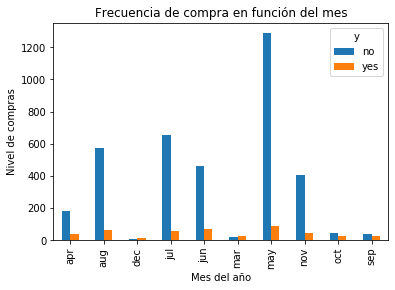

In [363]:
table = pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Nivel de compras')

### Histograma de la edad

Text(0, 0.5, 'Cliente')

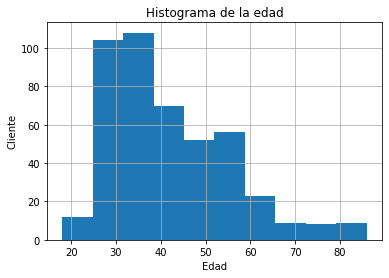

In [364]:
filter = data['y_new'] == 1
data_compra = data.where(filter, inplace=False)
data_compra.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

### Antes se acepto o no o nunca formó parte de una campaña

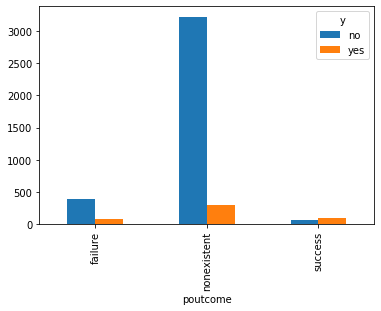

In [365]:
table_2 = pd.crosstab(data.poutcome, data.y)
table_2.plot(kind="bar", stacked=False)

## Conversión de las variables categóricas a dummies

In [366]:
columns_to_take = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data_prepared = pd.DataFrame(data[columns_to_take])

categories = ['job', 'marital', 'education_new', 'default', 'housing', 'loan', 'contact', 
              'month', 'day_of_week', 'poutcome']
for category in categories:
    cat_list = category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data_prepared = data_prepared.join(cat_dummies)

In [367]:
X = data_prepared
Y = data['y_new']

In [368]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [369]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_new, Length: 4119, dtype: int32

### Selección de rasgos para el modelo

In [370]:
num_features = 12

In [371]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [372]:
model = LogisticRegression(solver='liblinear', max_iter=100)
# model = LogisticRegression()

In [373]:
# rfe = RFE(model)
rfe = RFE(model, num_features)
rfe = rfe.fit(X, Y)

In [374]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [375]:
print(rfe.ranking_)

[34 42 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 47 19 44
 31 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 46 37 28 43 29 11  1  7  1]


In [376]:
list(zip(X.columns.tolist(), rfe.support_, rfe.ranking_))

[('age', False, 34),
 ('duration', False, 42),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('job_admin.', False, 22),
 ('job_blue-collar', False, 3),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 36),
 ('job_management', False, 2),
 ('job_retired', False, 38),
 ('job_self-employed', True, 1),
 ('job_services', False, 5),
 ('job_student', False, 30),
 ('job_technician', False, 32),
 ('job_unemployed', False, 12),
 ('job_unknown', False, 47),
 ('marital_divorced', False, 19),
 ('marital_married', False, 44),
 ('marital_single', False, 31),
 ('marital_unknown', False, 50),
 ('education_new_Basic', False, 26),
 ('education_new_High School', False, 13),
 ('education_new_Illiterate', False, 48),
 ('education_new_Professional course', False, 21),
 ('education_new_University Degree', False, 41),
 ('education

In [377]:
from itertools import compress
selected_features = list(compress(X.columns.tolist(), rfe.support_))
selected_features

['previous',
 'euribor3m',
 'job_entrepreneur',
 'job_self-employed',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_failure',
 'poutcome_success']

In [378]:
rfe.n_features_

12

In [379]:
X_2 = X[selected_features]
Y_2 = Y

## Implementación del modelo en Python con statsmodel.api

In [380]:
import statsmodels.api as sm

In [381]:
logit_model = sm.Logit(Y_2, X_2)

In [382]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


In [383]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.192      
Dependent Variable: y_new            AIC:              2323.8813  
Date:               2019-11-10 13:03 BIC:              2399.7617  
No. Observations:   4119             Log-Likelihood:   -1149.9    
Df Model:           11               LL-Null:          -1422.9    
Df Residuals:       4107             LLR p-value:      4.9751e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
previous           0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
euribor3m         -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
==================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [384]:
from sklearn import linear_model

In [385]:
logit_model = linear_model.LogisticRegression(solver='liblinear', max_iter=100)
logit_model.fit(X_2, Y_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
logit_model.score(X_2, Y_2)

0.9021607186210245

In [387]:
selected_features

['previous',
 'euribor3m',
 'job_entrepreneur',
 'job_self-employed',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_failure',
 'poutcome_success']

In [388]:
np.transpose(logit_model.coef_)

array([[ 0.37983161],
       [-0.50274907],
       [-0.34306616],
       [-0.33506416],
       [ 0.8733168 ],
       [ 0.38208745],
       [ 0.50969498],
       [ 1.27036123],
       [-0.74308963],
       [ 0.41185575],
       [-0.75316187],
       [ 1.07783253]])

In [390]:
pd.DataFrame(list(zip(selected_features, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.3798316125813854]
1,euribor3m,[-0.5027490719584349]
2,job_entrepreneur,[-0.3430661559518566]
3,job_self-employed,[-0.3350641633159212]
4,month_dec,[0.8733167990598997]
5,month_jul,[0.38208744979830184]
6,month_jun,[0.5096949825684224]
7,month_mar,[1.2703612296217248]
8,month_may,[-0.7430896313442942]
9,month_oct,[0.41185574628149324]


## Validación del modelo logístico

In [395]:
from sklearn.model_selection  import train_test_split

In [405]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.3, random_state=1)

logit_model = linear_model.LogisticRegression(solver='liblinear', max_iter=100)
logit_model.fit(X_train, Y_train)
logit_model.score(X_test, Y_test)

0.906957928802589

In [419]:
from IPython.display import display, Math, Latex

In [422]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [414]:
# threshold = umbral
probs = logit_model.predict_proba(X_test)
pd.DataFrame(probs)

,0,1
0,0.706385,0.293615
1,0.953329,0.046671
2,0.550053,0.449947
3,0.843854,0.156146
4,0.978575,0.021425
...,...,...
1231,0.930564,0.069436
1232,0.954809,0.045191
1233,0.978478,0.021522
1234,0.622137,0.377863


In [432]:
prediction = logit_model.predict(X_test)
pd.DataFrame(prediction)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1231,0
1232,0
1233,0
1234,0


In [426]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [431]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.293615,1
1,0.046671,0
2,0.449947,1
3,0.156146,1
4,0.021425,0


In [439]:
pd.crosstab(prediction, columns="count")

col_0,count
row_0,
0,1192
1,44


In [441]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,871
1,365


In [443]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1008
1,228


In [444]:
from sklearn import metrics

In [457]:
print(f'Accuracy: {metrics.accuracy_score(Y_test, prediction)}')
print(f'Precision: {metrics.precision_score(Y_test, prediction)}')
print(f'Recall: {metrics.recall_score(Y_test, prediction)}')

Accuracy: 0.906957928802589
Precision: 0.6136363636363636
Recall: 0.216


In [449]:
metrics.accuracy_score(Y_test, prob_df.prediction)

0.8325242718446602